### Comparing more than two groups together

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1DW-2yHUm0YhH01r_kNp9ir5CaAlo9s48dhpIx-6J-TM/gviz/tq?tqx=out:csv&sheet=Diets'
df = pd.read_csv(url)
df.head()

,gender,Age,Height,pre.weight,Diet,weight6weeks,kg_lost
0,0,22,159,58,1,54.2,3.8
1,0,46,192,60,1,54.0,6.0
2,0,55,170,64,1,63.3,0.7
3,0,33,171,64,1,61.1,2.9
4,0,50,170,65,1,62.2,2.8


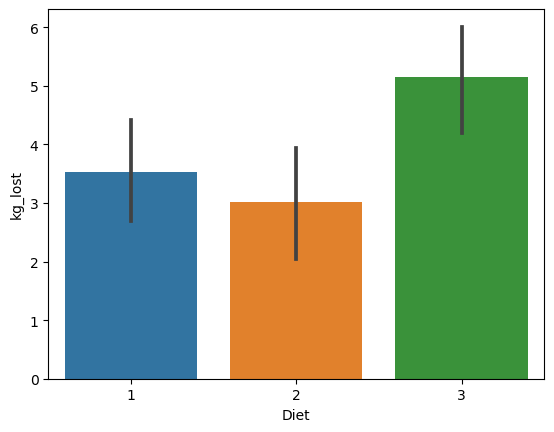

In [3]:
sns.barplot(data=df, x='Diet',y='kg_lost');

In [4]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['Diet'].unique():
    ## Get series for group and rename
    data = df.loc[df['Diet']==i,'kg_lost'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys([1, 2, 3])

In [12]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
1,26.0,0.216027,3.064706
2,27.0,0.841993,0.343967
3,27.0,0.463144,1.539436


In [6]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
1,26.0,0.216027,3.064706,False
2,27.0,0.841993,0.343967,False
3,27.0,0.463144,1.539436,False


In [7]:
# not using * operator, entering each group manually
stats.levene(groups[1],
            groups[2],
            groups[3])

LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)

In [8]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)

In [9]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=5.679765022955312, pvalue=0.005001924377430895)

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['kg_lost']
labels = df['Diet']

In [11]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.5125,0.7204,-2.0964,1.0713,False
1,3,1.6097,0.0455,0.0259,3.1935,True
2,3,2.1222,0.0051,0.5534,3.691,True


## Categorical Hypothesis Testing

In [13]:
import scipy.stats as stats

In [14]:
# Save outcomes of 14 H (success), 6 T (failure)
outcomes = [14,6]
p_value = stats.binom_test(outcomes,p=0.5) # p is the expected probability of success (heads)
p_value

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_27204\2484258908.py:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(outcomes,p=0.5) # p is the expected probability of success (heads)


0.11531829833984375

In [15]:
## Save outcomes of 16 heads (success) and 4 tails (failure)
outcomes = [16,4]
p_value = stats.binom_test(outcomes,p=0.5)  # p is expected probability of success (heads)
p_value

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_27204\935476100.py:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(outcomes,p=0.5)  # p is expected probability of success (heads)


0.01181793212890625

In [16]:
# Titanic data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRsXeEswMPJqEh9xpXed0eJYaQf_aKkNCypU4TKvGrS_hucLW2IWUxrVBjlKQJR4Z_EQFE-YR4UUuTz/pub?output=csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


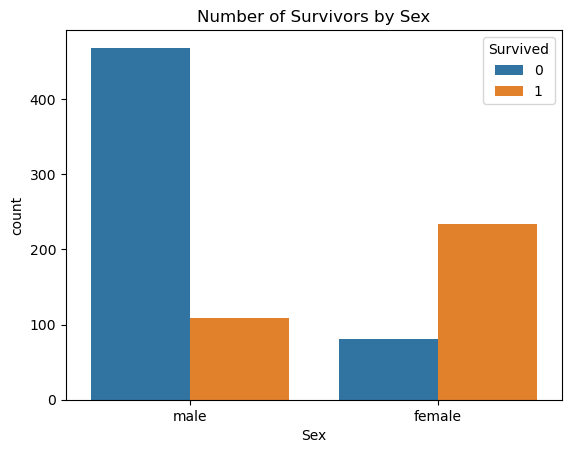

In [17]:
ax = sns.countplot(data=df, x='Sex',hue='Survived',)
ax.set_title("Number of Survivors by Sex");

In [18]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['Sex'], df['Survived'])
table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [19]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [20]:
# What was our p-value?
print(p)
p<.05

1.1973570627755645e-58


True